<h4>Phillies Baseball R&D Questionnaire - Question B</h4>
<ul>
<li>In baseball, a team can provide a departing free agent player with a qualifying offer1: a one-year contract whose monetary value is the average of the 125 highest salaries from the past season. The player is free to reject it and sign with any other team, but his new team will have to forfeit a draft pick. </li>
<li>Use the provided dataset to write a program or application that determines the monetary value of the upcoming qualifying offer and displays the amount along with any other relevant information or visualizations to the user. Note that while the URL and general format of the data will be consistent, the data itself can change slightly with each page load, so make sure your code pulls the data each time it is run and expect the final result to change each time.</li>

<li>Notes regarding source code below:
<ol>
<li>Code reads 'data.html' with urllib request and parses html to extract table data with BeautifulSoup4</li>
<li>Salary data is tested for integrity; non-numeric values are not included (through use of try/except block)</li>
<li>Salary data list is reverse sorted and the top 125 salaries are shown in a histogram; the salary range is of the top 125 salaries is shown</li>
<li>The proposed qualifying offer is output with the min/max of the 125 player salary range</li>
<li>To run code, execute the JupyterLab notebook</li>
</ol>
</li>
</ul>

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from bs4 import BeautifulSoup

In [2]:
NUM_PLAYERS = 125
SALARY_URL = 'https://questionnaire-148920.appspot.com/swe/data.html'

In [3]:
# get (first and only) table from url 
content = urllib.request.urlopen(SALARY_URL)
read_content = content.read()
soup = BeautifulSoup(read_content, 'lxml') 
table = soup.find_all('table')[0] 
    
# get list of player salaries from html table (provided)
salaries = []
for row in table.find_all("tr")[1:]:
    cols = row.find_all('td')
    for col in cols:
        colname = col['class'][0].replace('player-', '')
        if colname == 'salary':
            salary = col.get_text()
            try:
                salaries.append(int(col.get_text().replace(',','').replace('$', '')))
            except ValueError:
                continue
                
# sort salaries in descending order
sorted_salaries = sorted(salaries, reverse=True)
# determine qualifying offer from top 125 player salaries
proposed_salary = sum(sorted_salaries[: NUM_PLAYERS]) / NUM_PLAYERS   

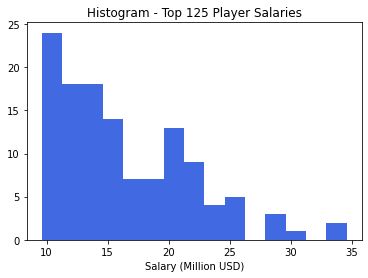

In [4]:
# show histogram of top 125 salaries
fig, ax = plt.subplots() 
ax.hist([x / 1e6 for x in sorted_salaries[: NUM_PLAYERS]], bins=15, color='royalblue') 
ax.set_title("Histogram - Top 125 Player Salaries")
ax.set_xlabel('Salary (Million USD)')
plt.show() 

In [5]:
print('Salary range for top 125 players: ${:,.0f} to ${:,.0f}'.format(sorted_salaries[NUM_PLAYERS - 1], sorted_salaries[0], ))
print('Proposed Qualifying Offer:        ${:,.0f}'.format(proposed_salary))

Salary range for top 125 players: $9,625,000 to $34,571,429
Proposed Qualifying Offer:        $16,376,527
